<a href="https://colab.research.google.com/github/ondhokaar/Strip-AI/blob/main/7Apr_fixingAugData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import cv2
import imghdr
from matplotlib import pyplot as plt

## *Setup kaggle API*

---



In [34]:
!pip install -q kaggle
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [35]:
!kaggle datasets download -d khivnguyn/mayo-competition-dataset

 87% 21.0M/24.2M [00:02<00:00, 15.1MB/s]
100% 24.2M/24.2M [00:02<00:00, 12.3MB/s]


In [ ]:
!unzip /content/mayo-competition-dataset.zip


done setup

---





In [37]:
os.listdir('./')

['.config',
 'Mayo_Competition_V2',
 'mayo-competition-dataset.zip',
 'Mayo_Competition',
 'kaggle.json',
 'sample_data']

In [38]:
df = pd.read_csv('./Mayo_Competition_V2/train.csv')
df

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE
...,...,...,...,...,...
952,fd684f_0_flip,11,fd684f,0,LAA
953,fde9ba_0_flip,4,fde9ba,0,LAA
954,fe9bec_0_flip,4,fe9bec,0,LAA
955,ffec5c_0_flip,7,ffec5c,0,LAA


In [39]:
df_flipped = df.loc[df.image_id.str.contains('_flip')]
df_original = df.loc[~df.image_id.str.contains('_flip')]

In [43]:
l = []
for i in range(len(df_flipped)):
  l.append(df_flipped.iloc[i].image_id[:-5])
    

In [44]:
df_augR = df_original[df_original.image_id.isin(l)]

In [45]:
df_single = df_original[~df_original.image_id.isin(l)]

In [46]:
df_single

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
4,026c97_0,4,026c97,0,CE
6,029c68_0,5,029c68,0,CE
7,032f10_0,7,032f10,0,CE
...,...,...,...,...,...
744,fdf998_0,4,fdf998,0,CE
745,fdf998_1,4,fdf998,1,CE
746,fe0cca_0,1,fe0cca,0,CE
747,fe9645_0,3,fe9645,0,CE


In [47]:
df_single

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
4,026c97_0,4,026c97,0,CE
6,029c68_0,5,029c68,0,CE
7,032f10_0,7,032f10,0,CE
...,...,...,...,...,...
744,fdf998_0,4,fdf998,0,CE
745,fdf998_1,4,fdf998,1,CE
746,fe0cca_0,1,fe0cca,0,CE
747,fe9645_0,3,fe9645,0,CE


In [48]:
df_augR

,image_id,center_id,patient_id,image_num,label
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
5,028989_0,5,028989,0,LAA
10,03d1ec_0,11,03d1ec,0,LAA
20,055f6a_0,6,055f6a,0,LAA
...,...,...,...,...,...
738,fd684f_0,11,fd684f,0,LAA
743,fde9ba_0,4,fde9ba,0,LAA
748,fe9bec_0,4,fe9bec,0,LAA
750,ffec5c_0,7,ffec5c,0,LAA


In [49]:
df_flipped

,image_id,center_id,patient_id,image_num,label
752,00c058_0_flip,11,00c058,0,LAA
753,01adc5_0_flip,11,01adc5,0,LAA
754,028989_0_flip,5,028989,0,LAA
755,03d1ec_0_flip,11,03d1ec,0,LAA
756,055f6a_0_flip,6,055f6a,0,LAA
...,...,...,...,...,...
952,fd684f_0_flip,11,fd684f,0,LAA
953,fde9ba_0_flip,4,fde9ba,0,LAA
954,fe9bec_0_flip,4,fe9bec,0,LAA
955,ffec5c_0_flip,7,ffec5c,0,LAA


In [50]:
df_flipped

,image_id,center_id,patient_id,image_num,label
752,00c058_0_flip,11,00c058,0,LAA
753,01adc5_0_flip,11,01adc5,0,LAA
754,028989_0_flip,5,028989,0,LAA
755,03d1ec_0_flip,11,03d1ec,0,LAA
756,055f6a_0_flip,6,055f6a,0,LAA
...,...,...,...,...,...
952,fd684f_0_flip,11,fd684f,0,LAA
953,fde9ba_0_flip,4,fde9ba,0,LAA
954,fe9bec_0_flip,4,fe9bec,0,LAA
955,ffec5c_0_flip,7,ffec5c,0,LAA


In [51]:
df.loc[[1]]

,image_id,center_id,patient_id,image_num,label
1,008e5c_0,11,008e5c,0,CE


In [52]:
c = 0
for i in range(len(df_original)):
  if df.iloc[i].image_id[:] in l:
    c+=1
print(c)

205


In [53]:
205*.33

67.65

<hr><hr>

In [55]:
import shutil

os.mkdir('./data_fixed')
os.mkdir('./data_fixed/train')
os.mkdir('./data_fixed/train/LAA')
os.mkdir('./data_fixed/train/CE')

os.mkdir('./data_fixed/val')
os.mkdir('./data_fixed/val/LAA')
os.mkdir('./data_fixed/val/CE')

os.mkdir('./data_fixed/test')
os.mkdir('./data_fixed/test/LAA')
os.mkdir('./data_fixed/test/CE')

### split **CE** 

In [56]:
int(547*.7) + int(547*.2) + int(547*.1) +2

547

In [57]:
train_size = int(df_single.shape[0]*.70)
val_size = int(df_single.shape[0]*.20)
test_size = int(df_single.shape[0]*.10)+2
#train 70%
for i in range(train_size):
  src = './Mayo_Competition_V2/train_224/'+df_single.iloc[i].image_id+'.jpg'
  dest = './data_fixed/train/CE/'+df_single.iloc[i].image_id+'.jpg'
  shutil.copy(src, dest)

#val 20%
for i in range(train_size, train_size+val_size):
  src = './Mayo_Competition_V2/train_224/'+df_single.iloc[i].image_id+'.jpg'
  dest = './data_fixed/val/CE/'+df_single.iloc[i].image_id+'.jpg'
  shutil.copy(src, dest)
#test 10%
for i in range(train_size+val_size, train_size+val_size+test_size):
  src = './Mayo_Competition_V2/train_224/'+df_single.iloc[i].image_id+'.jpg'
  dest = './data_fixed/test/CE/'+df_single.iloc[i].image_id+'.jpg'
  shutil.copy(src, dest) 

### split **LAA** 

In [58]:
df_flipped.shape[0], df_augR.shape[0]

(205, 205)

In [59]:
train_size = int(df_augR.shape[0]*.70)
val_size = int(df_augR.shape[0]*.20)
test_size = int(df_augR.shape[0]*.10)

In [60]:
train_size + val_size + test_size

204

In [61]:
train_size = int(df_augR.shape[0]*.70)
val_size = int(df_augR.shape[0]*.20)
test_size = int(df_augR.shape[0]*.10)+1
#train 70%
for i in range(train_size):
  src = './Mayo_Competition_V2/train_224/'+df_augR.iloc[i].image_id+'.jpg'
  dest = './data_fixed/train/LAA/'+df_augR.iloc[i].image_id+'.jpg'
  src2 = './Mayo_Competition_V2/train_224/'+df_augR.iloc[i].image_id+'_flip.jpg'
  dest2 = './data_fixed/train/LAA/'+df_augR.iloc[i].image_id+'_flip.jpg'
  shutil.copy(src, dest) 
  shutil.copy(src2, dest2)

#val 20%
for i in range(train_size, train_size+val_size):
  src = './Mayo_Competition_V2/train_224/'+df_augR.iloc[i].image_id+'.jpg'
  dest = './data_fixed/val/LAA/'+df_augR.iloc[i].image_id+'.jpg'
  src2 = './Mayo_Competition_V2/train_224/'+df_augR.iloc[i].image_id+'_flip.jpg'
  dest2 = './data_fixed/val/LAA/'+df_augR.iloc[i].image_id+'_flip.jpg'
  shutil.copy(src, dest) 
  shutil.copy(src2, dest2)
#test 10%
for i in range(train_size+val_size, train_size+val_size+test_size):
  src = './Mayo_Competition_V2/train_224/'+df_augR.iloc[i].image_id+'.jpg'
  dest = './data_fixed/test/LAA/'+df_augR.iloc[i].image_id+'.jpg'
  src2 = './Mayo_Competition_V2/train_224/'+df_augR.iloc[i].image_id+'_flip.jpg'
  dest2 = './data_fixed/test/LAA/'+df_augR.iloc[i].image_id+'_flip.jpg'
  shutil.copy(src, dest) 
  shutil.copy(src2, dest2)

## ***Class Ratio***

In [62]:
print('train: ', 'CE: ', len(os.listdir('./data_fixed/train/CE'))  /  (len(os.listdir('./data_fixed/train/CE')) + len(os.listdir('./data_fixed/train/LAA'))))
print('val: ', 'CE: ', len(os.listdir('./data_fixed/val/CE'))  /  (len(os.listdir('./data_fixed/val/CE')) + len(os.listdir('./data_fixed/val/LAA'))))
print('test: ', 'CE: ', len(os.listdir('./data_fixed/test/CE'))  /  (len(os.listdir('./data_fixed/test/CE')) + len(os.listdir('./data_fixed/test/LAA')))) 

train:  CE:  0.5718562874251497
val:  CE:  0.5706806282722513
test:  CE:  0.5714285714285714



---

# ***LOADING DATA*** *using* `Tensorflow`



---



In [63]:
train = tf.keras.utils.image_dataset_from_directory('./data_fixed/train', batch_size = 64, image_size=(224, 224))


Found 668 files belonging to 2 classes.


In [64]:
val = tf.keras.utils.image_dataset_from_directory('./data_fixed/val', batch_size = 64, image_size=(224, 224))


Found 191 files belonging to 2 classes.


In [65]:
test = tf.keras.utils.image_dataset_from_directory('./data_fixed/test', batch_size = 64, image_size=(224, 224))

Found 98 files belonging to 2 classes.


# *Scaling Data*
*each pixel value was initially within 0 to 255<br>
we will scale it to 0 to 1*

In [66]:
train = train.map(lambda x, y: (x/255, y))
val = val.map(lambda x, y: (x/255, y))
test = test.map(lambda x, y: (x/255, y))

some training image:

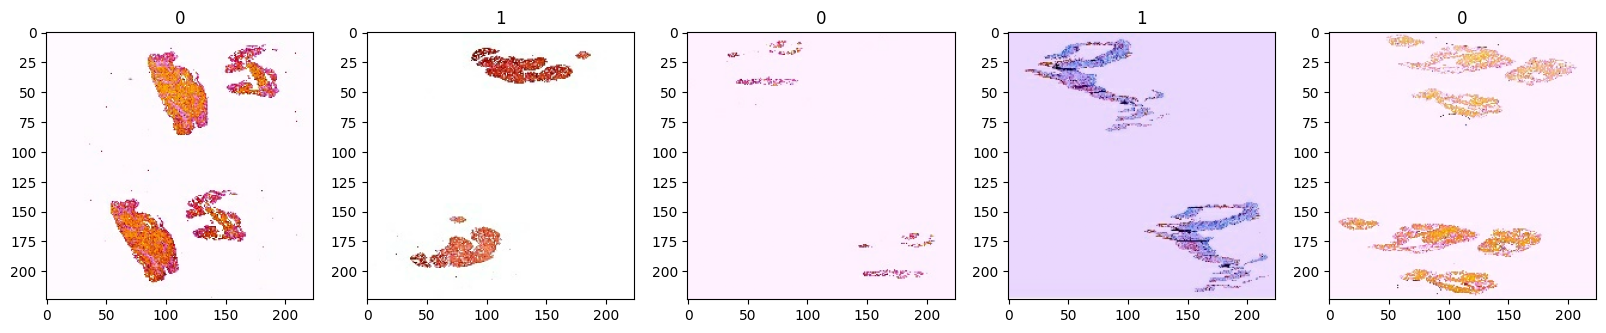

In [67]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
batch = train.as_numpy_iterator().next()
for idx, img in enumerate(batch[0][0:5]):
    #ax[idx].imshow(img)
    ax[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[idx].title.set_text(batch[1][idx])

some val image:

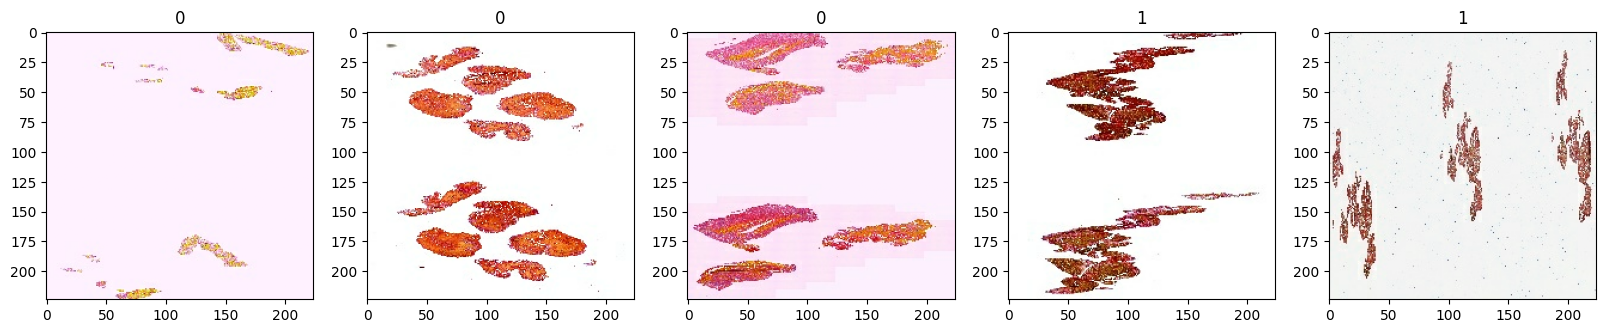

In [68]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
batch = val.as_numpy_iterator().next()
for idx, img in enumerate(batch[0][0:5]):
    #ax[idx].imshow(img)
    ax[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[idx].title.set_text(batch[1][idx])

some test image:

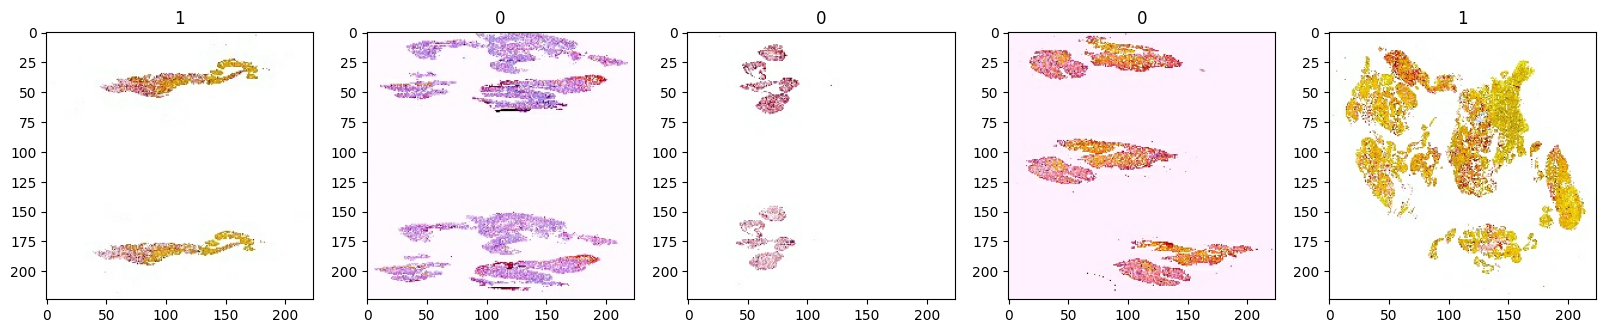

In [69]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
batch = test.as_numpy_iterator().next()
for idx, img in enumerate(batch[0][0:5]):
    #ax[idx].imshow(img)
    ax[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[idx].title.set_text(batch[1][idx])

In [70]:
len(train), len(val), len(test)

(11, 3, 2)

# *CNN Model*

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [72]:
model = Sequential()

In [73]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224, 224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))






In [74]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 16)       0

In [76]:
logdir='logs'

In [77]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [78]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tb_callback])

Epoch 1/50
11/11 [==============================] - 15s 159ms/step - loss: 0.8173 - accuracy: 0.5090 - val_loss: 0.6901 - val_accuracy: 0.5759
Epoch 2/50
11/11 [==============================] - 2s 101ms/step - loss: 0.6912 - accuracy: 0.5180 - val_loss: 0.6849 - val_accuracy: 0.5707
Epoch 3/50
11/11 [==============================] - 1s 85ms/step - loss: 0.6760 - accuracy: 0.5719 - val_loss: 0.6931 - val_accuracy: 0.4974
Epoch 4/50
11/11 [==============================] - 1s 86ms/step - loss: 0.6614 - accuracy: 0.6093 - val_loss: 0.7045 - val_accuracy: 0.5654
Epoch 5/50
11/11 [==============================] - 1s 86ms/step - loss: 0.6372 - accuracy: 0.6243 - val_loss: 0.7414 - val_accuracy: 0.5236
Epoch 6/50
11/11 [==============================] - 1s 76ms/step - loss: 0.6145 - accuracy: 0.6737 - val_loss: 0.7388 - val_accuracy: 0.5131
Epoch 7/50
11/11 [==============================] - 1s 77ms/step - loss: 0.5596 - accuracy: 0.7051 - val_loss: 0.8177 - val_accuracy: 0.5183
Epoch 8/50

*Performance (accuracy & loss) on train & validation data:*

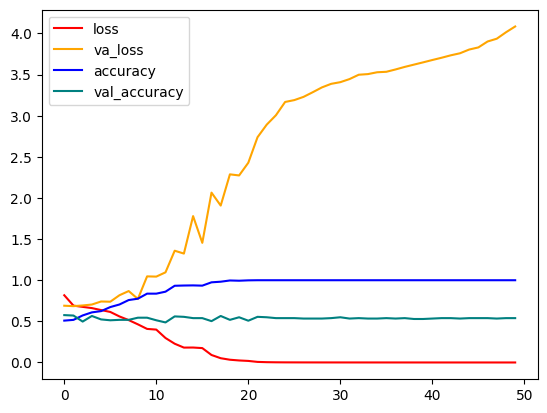

In [81]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='va_loss')

plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='teal', label='val_accuracy')
plt.legend()
plt.show()

*Evaluation on test data:*

In [82]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [83]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [84]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2/2 [==============================] - 0s 87ms/step


In [85]:
print('precision: ', pre.result().numpy()*100, '% ', '\nRecall: ', re.result().numpy()*100, '% ', '\nAccuracy: ', acc.result().numpy()*100, '% ')

precision:  48.78048896789551 %  
Recall:  47.61904776096344 %  
Accuracy:  56.122446060180664 % 
